# ReLu vs Sigmoid

## 1. Import Necessary Libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 2. Plot the Functions

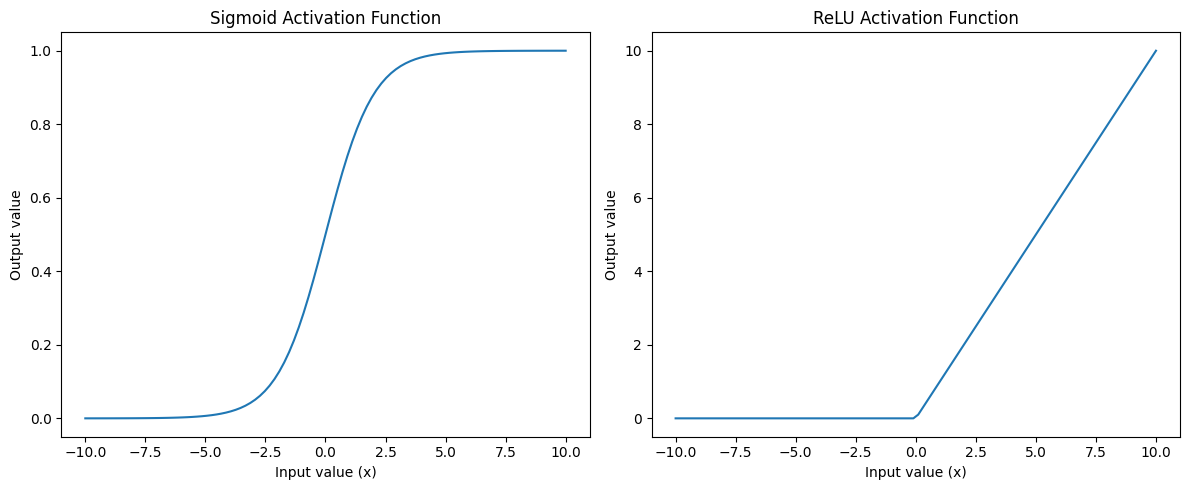

In [2]:
x = torch.linspace(-10, 10, 100)

y_sigmoid = torch.sigmoid(x)
y_relu = torch.relu(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x.numpy(), y_sigmoid.numpy())
plt.title("Sigmoid Activation Function")
plt.xlabel("Input value (x)")
plt.ylabel("Output value")

plt.subplot(1, 2, 2)
plt.plot(x.numpy(), y_relu.numpy())
plt.title("ReLU Activation Function")
plt.xlabel("Input value (x)")
plt.ylabel("Output value")

plt.tight_layout()
plt.show()

## 3. Visualizing Gradient Values

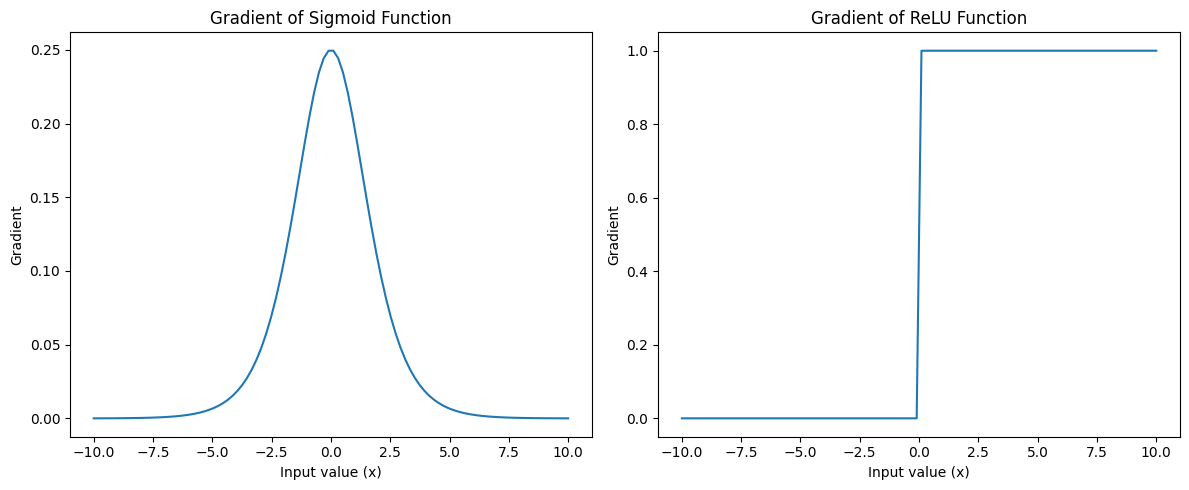

In [3]:
x = torch.linspace(-10, 10, 100, requires_grad=True)

y_sigmoid = torch.sigmoid(x)
y_relu = torch.relu(x)

sigmoid_grad = torch.autograd.grad(outputs=y_sigmoid, inputs=x, grad_outputs=torch.ones_like(y_sigmoid), create_graph=True)[0]

relu_grad = torch.autograd.grad(outputs=y_relu, inputs=x, grad_outputs=torch.ones_like(y_relu), create_graph=True)[0]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x.detach().numpy(), sigmoid_grad.detach().numpy())
plt.title("Gradient of Sigmoid Function")
plt.xlabel("Input value (x)")
plt.ylabel("Gradient")

plt.subplot(1, 2, 2)
plt.plot(x.detach().numpy(), relu_grad.detach().numpy())
plt.title("Gradient of ReLU Function")
plt.xlabel("Input value (x)")
plt.ylabel("Gradient")

plt.tight_layout()
plt.show()


# AdaGrad + RMSprop = Adam

Visualizing the Gradient Descent Optimization Algorithms: https://emiliendupont.github.io/2018/01/24/optimization-visualization/

# ReLU + LeakyReLU + ELU

ReLU is better than Sigmoid but it has a problem called "Dying ReLU" which means that some neurons(neuron outputs) will be zero and never activated again because of that they will never be used in any computation. To solve this problem LeakyReLU and ELU are proposed.

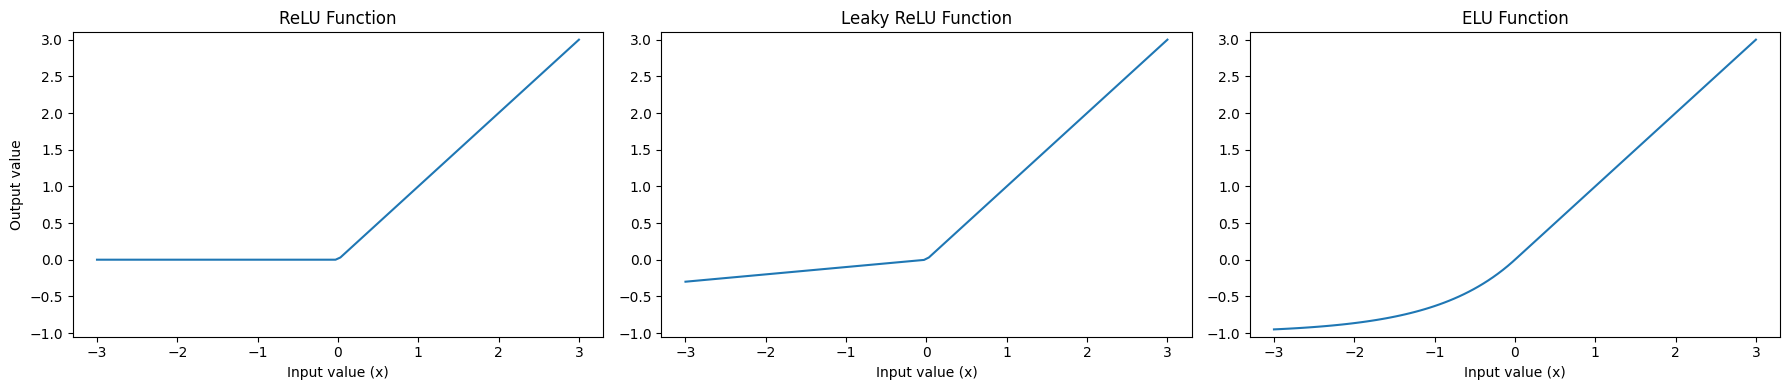

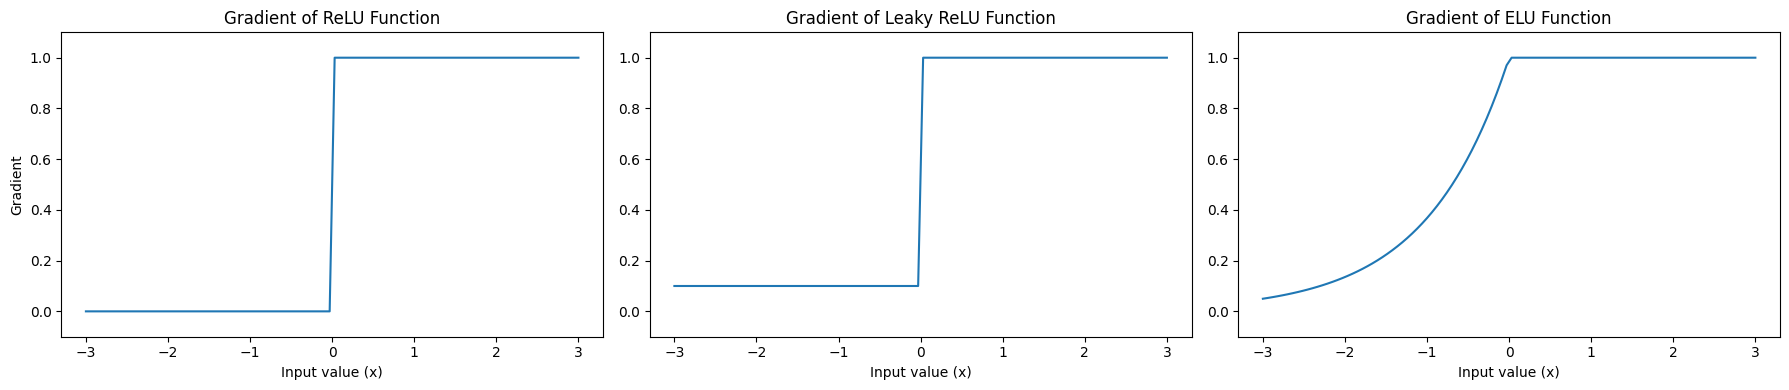

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = torch.linspace(-3, 3, 100, requires_grad=True)

y_relu = torch.relu(x)
y_relu.backward(torch.ones_like(x))
grad_relu = x.grad

x.grad = None

y_leaky_relu = torch.nn.functional.leaky_relu(x, negative_slope=0.1)
y_leaky_relu.backward(torch.ones_like(x))
grad_leaky_relu = x.grad

x.grad = None

y_elu = torch.nn.functional.elu(x, alpha=1.0)
y_elu.backward(torch.ones_like(x))
grad_elu = x.grad

max_val = max(torch.max(y_relu).item(), torch.max(y_leaky_relu).item(), torch.max(y_elu).item()) + 0.1
min_val = min(torch.min(y_relu).item(), torch.min(y_leaky_relu).item(), torch.min(y_elu).item()) - 0.1

plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.plot(x.detach().numpy(), y_relu.detach().numpy())
plt.title("ReLU Function")
plt.xlabel("Input value (x)")
plt.ylabel("Output value")
plt.ylim(min_val, max_val)

plt.subplot(1, 3, 2)
plt.plot(x.detach().numpy(), y_leaky_relu.detach().numpy())
plt.title("Leaky ReLU Function")
plt.xlabel("Input value (x)")
plt.ylim(min_val, max_val)

plt.subplot(1, 3, 3)
plt.plot(x.detach().numpy(), y_elu.detach().numpy())
plt.title("ELU Function")
plt.xlabel("Input value (x)")
plt.ylim(min_val, max_val)

plt.tight_layout()
plt.show()

grad_max_val = max(torch.max(grad_relu).item(), torch.max(grad_leaky_relu).item(), torch.max(grad_elu).item()) + 0.1
grad_min_val = min(torch.min(grad_relu).item(), torch.min(grad_leaky_relu).item(), torch.min(grad_elu).item()) - 0.1

plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.plot(x.detach().numpy(), grad_relu.detach().numpy())
plt.title("Gradient of ReLU Function")
plt.xlabel("Input value (x)")
plt.ylabel("Gradient")
plt.ylim(grad_min_val, grad_max_val)

plt.subplot(1, 3, 2)
plt.plot(x.detach().numpy(), grad_leaky_relu.detach().numpy())
plt.title("Gradient of Leaky ReLU Function")
plt.xlabel("Input value (x)")
plt.ylim(grad_min_val, grad_max_val)

plt.subplot(1, 3, 3)
plt.plot(x.detach().numpy(), grad_elu.detach().numpy())
plt.title("Gradient of ELU Function")
plt.xlabel("Input value (x)")
plt.ylim(grad_min_val, grad_max_val)

plt.tight_layout()
plt.show()


# Internal Covariate Shift (ICS) Problem

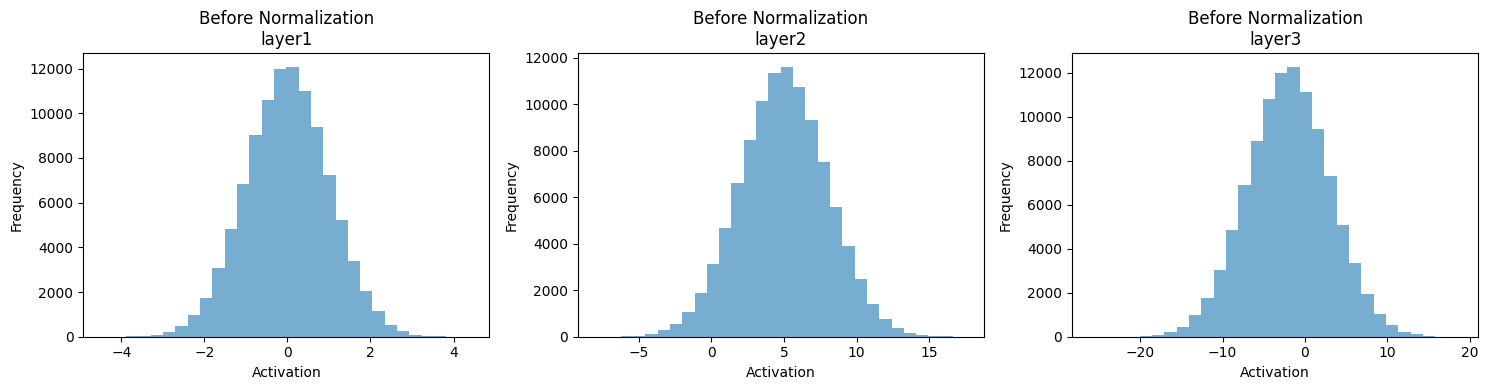

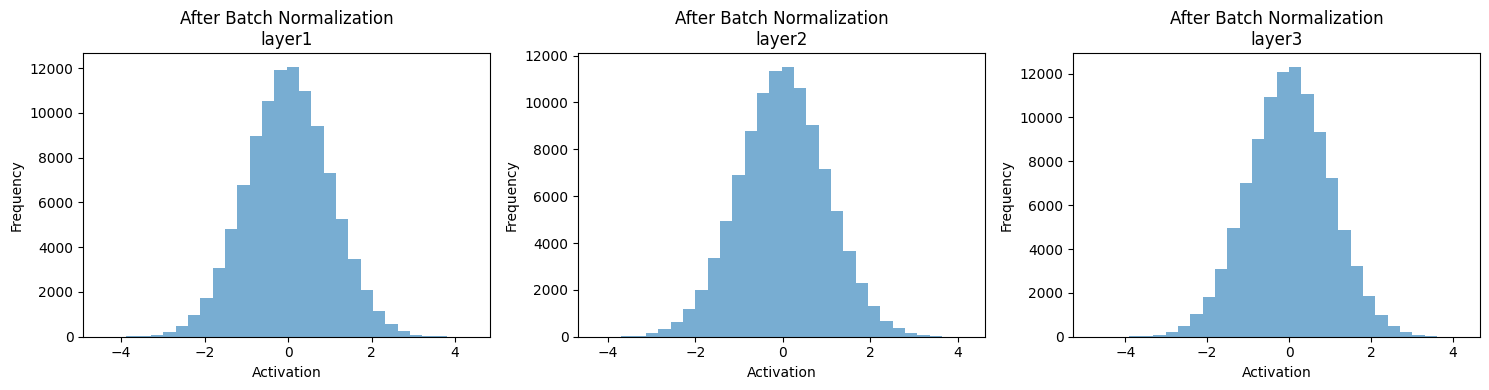

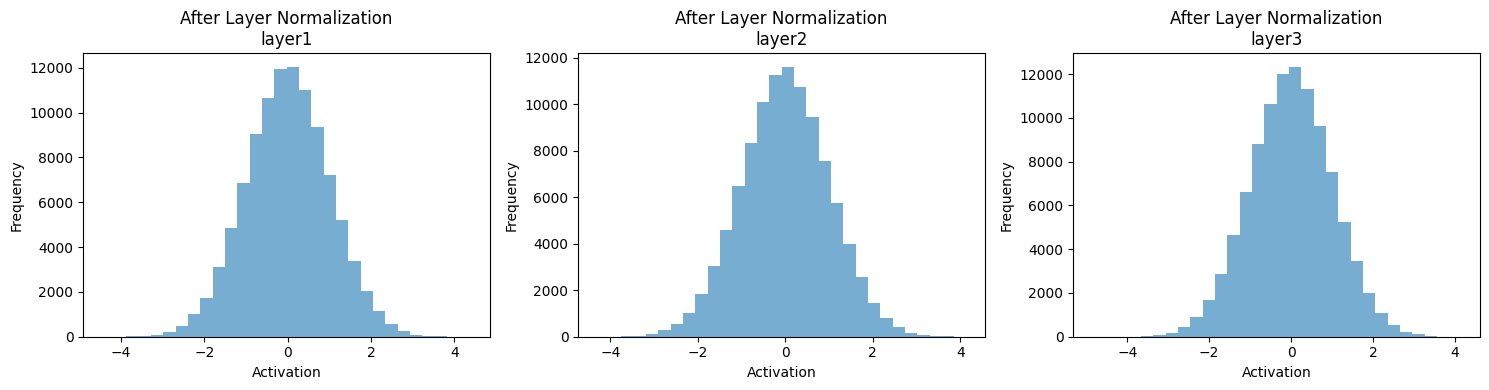

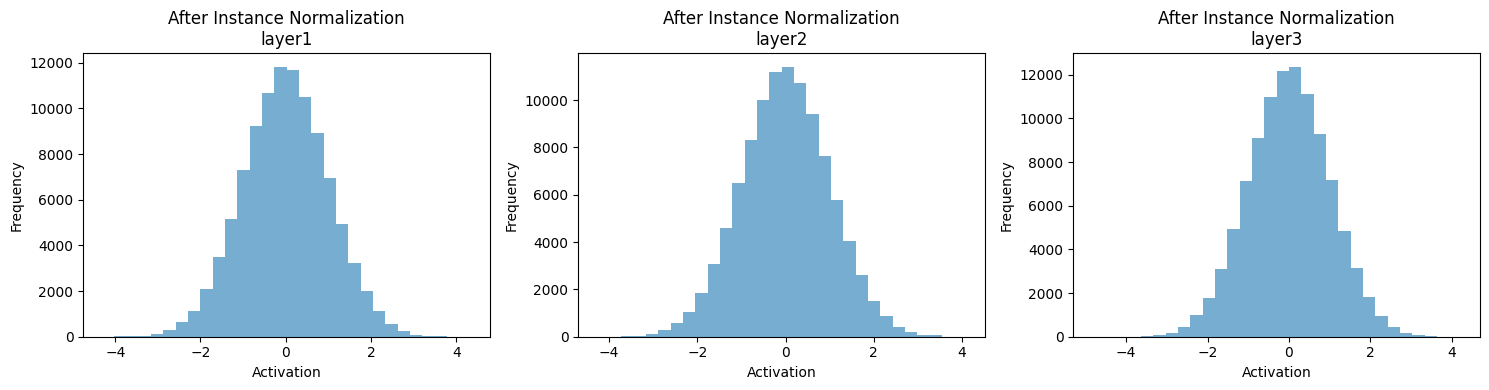

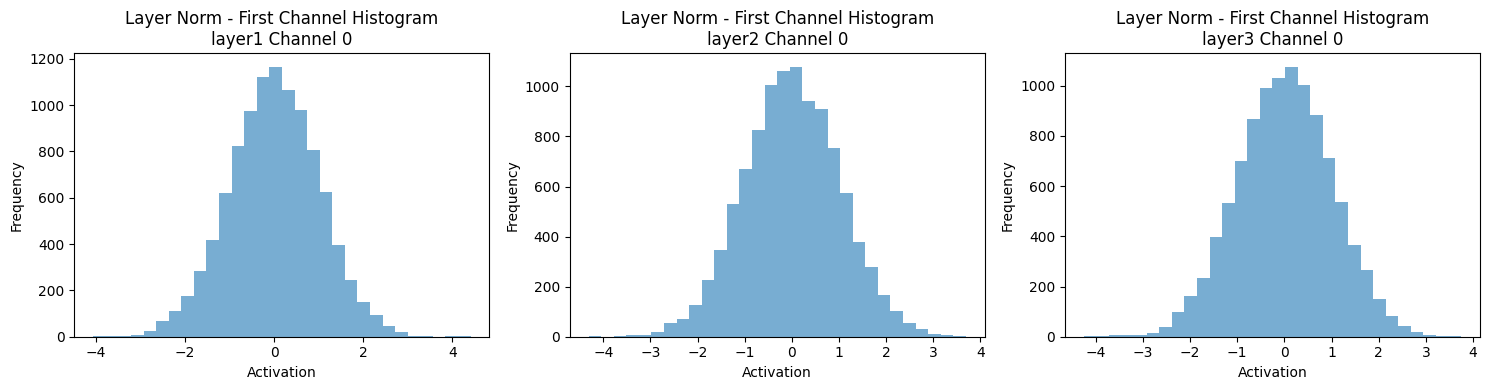

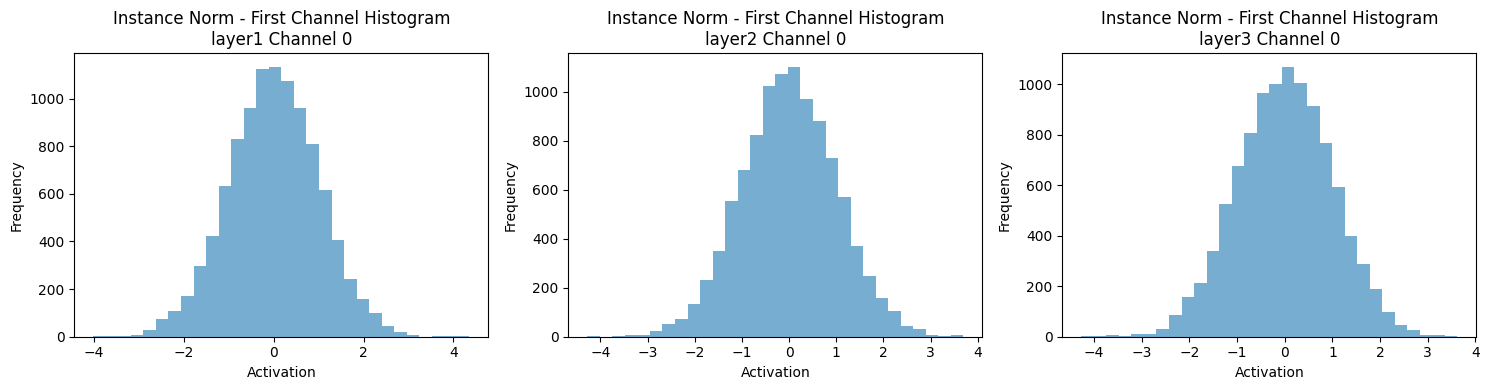

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

batch_size = 10
channels = 10
height = 32
width = 32

layer_activations = {
    'layer1': torch.randn(batch_size, channels, height, width),
    'layer2': 5 + 3 * torch.randn(batch_size, channels, height, width),
    'layer3': -2 + 5 * torch.randn(batch_size, channels, height, width)
}

def plot_histograms(activations, title):
    plt.figure(figsize=(15, 4))
    for i, (layer, act) in enumerate(activations.items(), 1):
        plt.subplot(1, len(activations), i)
        plt.hist(act.view(-1).detach().numpy(), bins=30, alpha=0.6)
        plt.title(f'{title}\n{layer}')
        plt.xlabel('Activation')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_channel_histograms(activations, title, channel_index=0):
    plt.figure(figsize=(15, 4))
    for i, (layer, act) in enumerate(activations.items(), 1):
        channel_activations = act[:, channel_index, :, :].reshape(-1).detach().numpy()  # Flatten the channel activations
        plt.subplot(1, len(activations), i)
        plt.hist(channel_activations, bins=30, alpha=0.6)
        plt.title(f'{title}\n{layer} Channel {channel_index}')
        plt.xlabel('Activation')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_histograms(layer_activations, "Before Normalization")

# Apply and plot Batch Normalization
batch_norm = nn.BatchNorm2d(channels)
batch_norm_activations = {layer: batch_norm(act) for layer, act in layer_activations.items()}
plot_histograms(batch_norm_activations, "After Batch Normalization")

# Apply and plot Layer Normalization
layer_norm = nn.LayerNorm([channels, height, width])
layer_norm_activations = {layer: layer_norm(act) for layer, act in layer_activations.items()}
plot_histograms(layer_norm_activations, "After Layer Normalization")

# Apply and plot Instance Normalization
instance_norm = nn.InstanceNorm2d(channels)
instance_norm_activations = {layer: instance_norm(act) for layer, act in layer_activations.items()}
plot_histograms(instance_norm_activations, "After Instance Normalization")

# Plot histograms for a specific channel
plot_channel_histograms(layer_norm_activations, "Layer Norm - First Channel Histogram", channel_index=0)
plot_channel_histograms(instance_norm_activations, "Instance Norm - First Channel Histogram", channel_index=0)


/home/simi2525/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


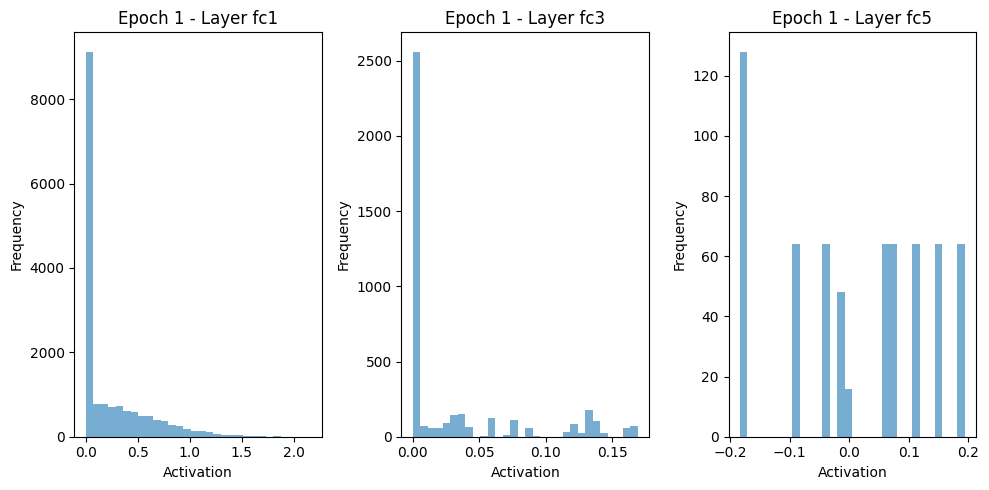

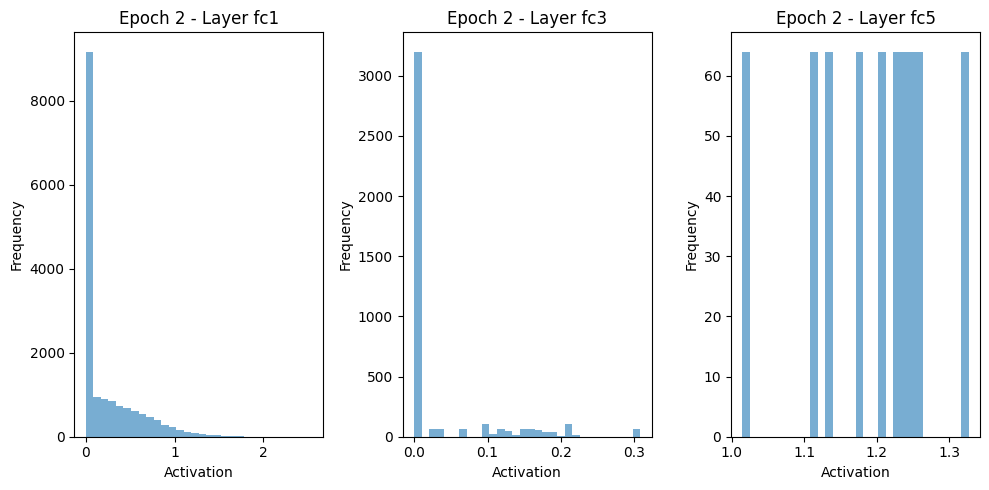

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc21 = nn.Linear(128, 128)
        self.fc22 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc31 = nn.Linear(64, 64)
        self.fc32 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 10)

    def forward(self, x):
        activations = {}
        x = torch.relu(self.fc1(x))
        activations['fc1'] = x.detach().view(-1)
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc21(x))
        x = torch.relu(self.fc22(x))
        activations['fc2'] = x.detach().view(-1)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc31(x))
        x = torch.relu(self.fc32(x))
        activations['fc3'] = x.detach().view(-1)
        x = torch.relu(self.fc4(x))
        activations['fc4'] = x.detach().view(-1)
        x = self.fc5(x)
        activations['fc5'] = x.detach().view(-1)
        return x, activations

model = Network()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=5.0)

def plot_activation_histograms(activations, epoch, layer_names):
    plt.figure(figsize=(10, 5))
    for i, layer_name in enumerate(layer_names, 1):
        plt.subplot(1, 3, i)
        plt.hist(activations[layer_name].numpy(), bins=30, alpha=0.6)
        plt.title(f'Epoch {epoch} - Layer {layer_name}')
        plt.xlabel('Activation')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

num_epochs = 2
batch_size = 64
input_size = 784
target_size = 10

for epoch in range(num_epochs):
    inputs = torch.randn(batch_size, input_size)
    targets = torch.ones((batch_size, target_size))

    outputs, activations = model(inputs)
    plot_activation_histograms(activations, epoch + 1, ['fc1', 'fc3', 'fc5'])

    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# Dropout

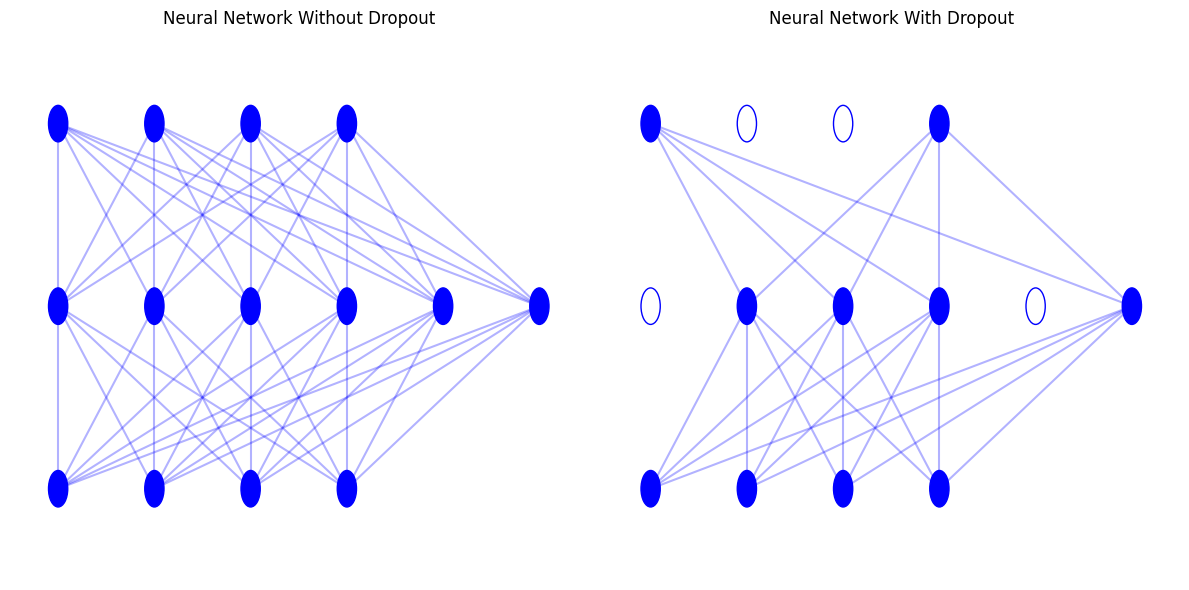

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the network
n_neurons_in_layer = [4, 6, 4]
dropout_rates = [0.4, 0.3]  # Dropout rates for the first and second layers

# Function to simulate dropout and apply it to the neurons
def apply_dropout(neurons, rate):
    dropout_mask = np.random.rand(len(neurons)) > rate
    return neurons * dropout_mask  # Apply mask to neurons

# Function to plot the layers and connections
def plot_network(ax, layers, connections, title):
    ax.set_title(title)
    for i, layer in enumerate(layers):
        for j, neuron in enumerate(layer):
            if neuron:  # If the neuron is 'on' (value is not zero)
                circle = plt.Circle((j, -i), 0.1, color='blue', fill=True)
            else:
                circle = plt.Circle((j, -i), 0.1, color='blue', fill=False)
            ax.add_artist(circle)
            if i < len(layers) - 1:  # Draw connections to next layer
                for k in range(len(layers[i+1])):
                    if neuron and layers[i+1][k]:  # If both neurons are 'on' (neuron is not zero)
                        line = plt.Line2D([j, k], [-i, -i-1], c='blue', alpha=0.3)
                        ax.add_artist(line)
    ax.axis('off')

# Create the layers
layers = [np.ones(n) for n in n_neurons_in_layer]

# Apply dropout to the layers
# Note: We don't apply dropout to the output layer, hence the dropout_rates + [0]
dropout_layers = [apply_dropout(layer, rate) for layer, rate in zip(layers, dropout_rates + [0])]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_network(axs[0], layers, [np.ones_like(layer) for layer in layers], 'Neural Network Without Dropout')
plot_network(axs[1], dropout_layers, [np.ones_like(layer) for layer in layers], 'Neural Network With Dropout')

# Set the same scaling for both subplots and center the neurons
for ax in axs:
    largest_layer = max(n_neurons_in_layer)
    ax.set_xlim(-0.5, largest_layer - 0.5)
    ax.set_ylim(-2.5, 0.5)

plt.tight_layout()
plt.show()
